In [6]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
from src.modules import conf, fit, spec, evl, pred
import seaborn as sns
import matplotlib.pyplot as plt
from src.heuristics import random_shooting
from src.heuristics import genetic_optimization

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [4]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )

100%|██████████| 361/361 [00:00<00:00, 732.74it/s] 


In [7]:
r_cross = conf['GO']['r_cross']
r_mut = conf['GO']['r_mut']

In [8]:
train_df, test_df = fit.get_train_test_df(data,ratio=0.7)
test_df, valid_df = fit.get_test_valid_df(test_df)
print(len(train_df),len(test_df),len(valid_df))
speed = valid_df.enhanced_speed
valid_df.drop('enhanced_speed',axis=1,inplace=True)

182943 103870 6449


In [11]:
replace_act = data[fit.get_race_index(data, '2022-10-02-10-30')]

In [23]:
_,_,rmse,cols, nrmse = random_shooting.random_shoot(
                          train_df=train_df,
                          test_df=test_df,
                          hmax=30,
                          endog='enhanced_speed',
                          )

100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


(6449, 4413)

In [24]:
best = cols[rmse.index(np.min(rmse))]
form = random_shooting.get_form(list(best),endog='enhanced_speed')
result = spec.ols_form(train_df, form)
pred_ols = pred.predict(valid_df, result)
evl.rmse(speed,pred_ols)

2.1130720155894416

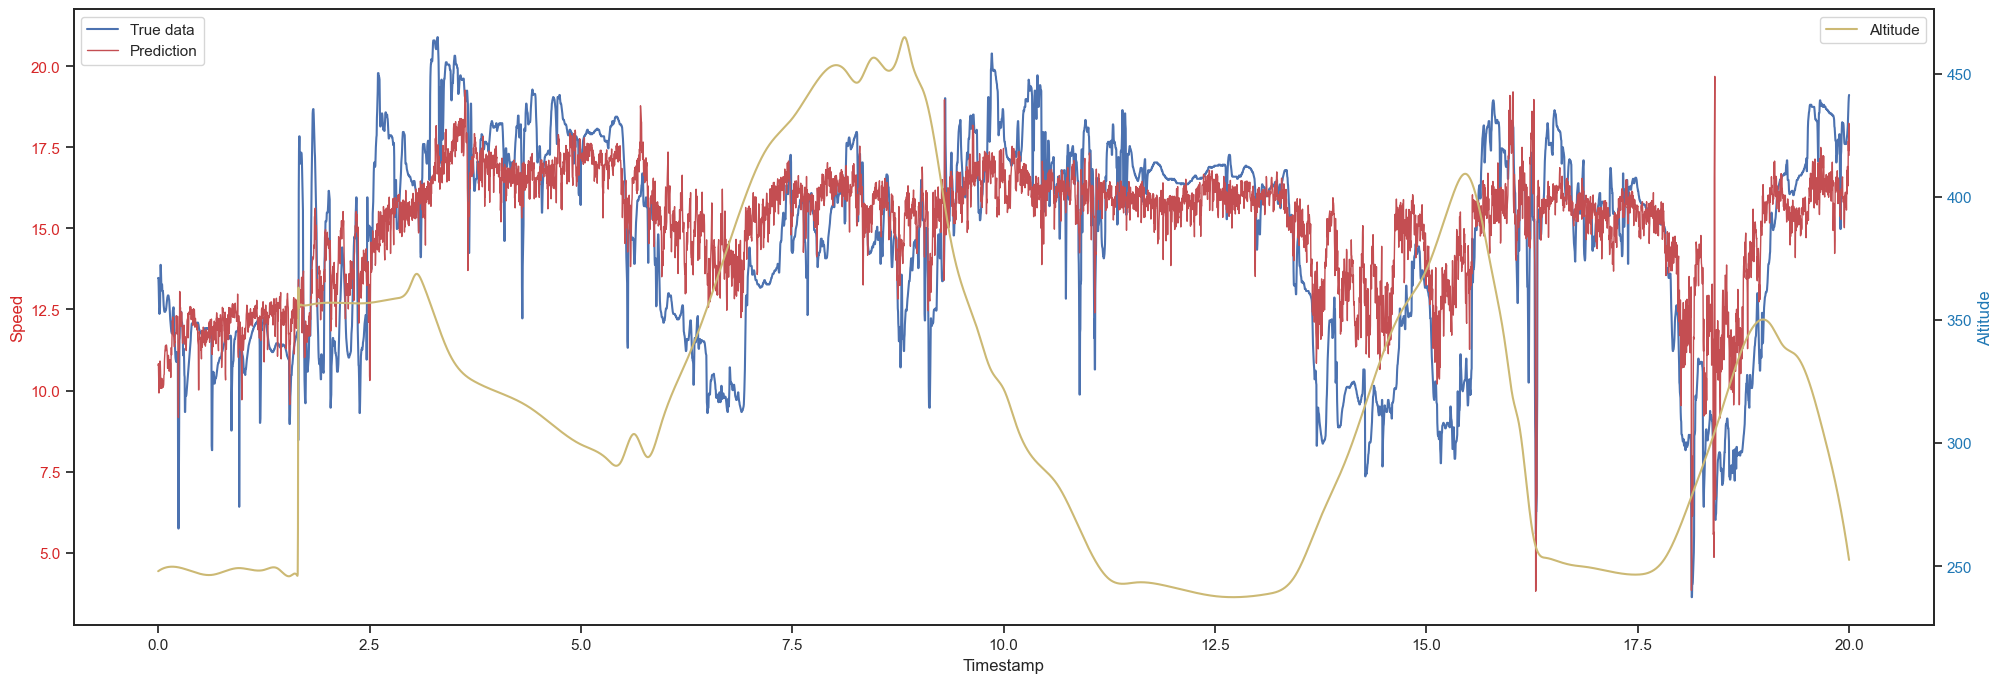

In [28]:
fig = evl.plot(df=valid_df,pred=pred_ols,endog='enhanced_speed',true_data=speed)